## Sampling

- How population and samples work
- Various sampling methods

Here is the workflow we'll begin working with

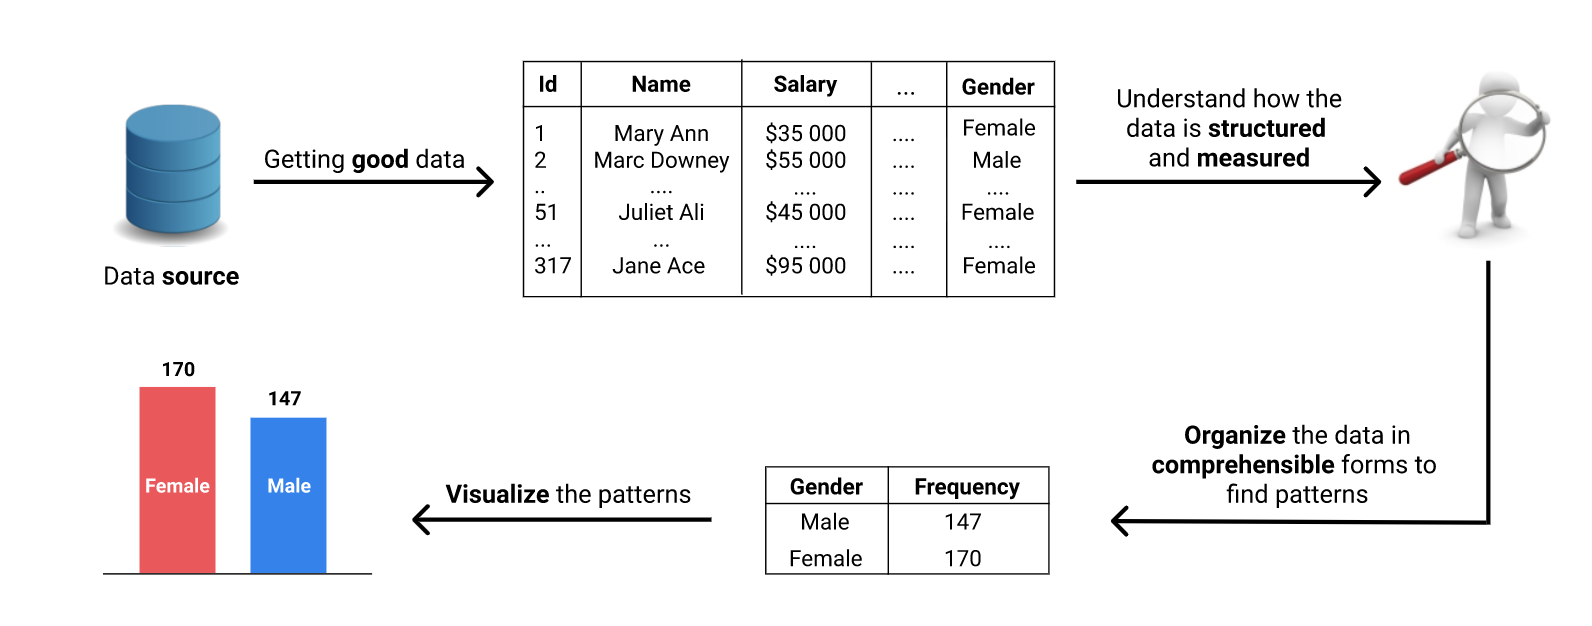

## Getting good data

As a data analyst, we'll often need to use a small dataset to answer questions about a much larger dataset. And we'll start exploring the details of collecting data.

## Population and Sample

In statistics, we call the set of all individuals relevant to a particular statistical question a population. 

We call a smaller group selected from a population a sample. When we select a smaller group from a population we're sampling. 

Example:

- Population: Total Employees in an Organization say 50K
- Sample: 100 Employees representing the Total population

Whether a dataset is a sample or a population depends on the question we're trying to answer. 

Now it's our turn to play the data analyst. We collected data about the salaries of all the individuals in the company working in IT roles. Based on this data, we want to answer a series of questions. Depending on the question, our data is either a sample or a population. Identify which is the case, 'population' or 'sample'. 

Here are the questions we need to answer:

- What's the average salary of the individuals in our company working in IT roles? Population
- What's the proportion of individuals in the IT department having salaries under dollar 60000? Population
- What's the minimum salary in the entire company? Sample
- What's the minimum salary in the IT department of our company? Population
- What's the proportion of salaries under dollar 20000 in the entire company? Sample

Hint:
The data we have is just for individuals working in IT roles. If we wanted to answer a question about all the individuals in our company (working in IT and non-IT roles), then our data would just be a sample.

## Sampling Error

A sample is, by definition, an incomplete dataset for the question we're trying to answer. For this reason, there's almost always some difference between the metrics of a population and the metrics of a sample. We can see this difference as an error, and because it's the result of sampling, we call it sampling error.

We call a metric specific to a population a parameter, and we call one specific to a sample a statistic.

Another way to think of the concept of the sampling error is as the difference between a parameter and a statistic:

sampling error = parameter − statistic

## Dataset

The dataset is about basketball players in the WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the 2016-2017 season. Thomas De Jonghe assembled this dataset, and you can download it from [Kaggle](https://www.kaggle.com/datasets/jinxbe/wnba-player-stats-2017)

In [1]:
import pandas as pd
wnba = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/datasets/wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [2]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [3]:
wnba.shape

(143, 32)

In [4]:
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

In [5]:
# Max num.of games played by a player in the 2016-2017 season
parameter = wnba["Games Played"].max()
print(parameter)

32


In [6]:
# Randomly select 30 players from the population
sample = wnba["Games Played"].sample(30, random_state = 1) 
sample
# random_state makes the results reproducible, meaning we'd get the same sample every time we ran the code

78     30
116    29
31     26
5      14
125    28
45     20
14      4
44     28
73     14
89     20
130    25
53     20
85     30
93     27
29     29
16     20
35      7
90      9
83     29
19     29
40     30
92     30
122    29
98     30
59     29
42     28
33     30
99     24
69     29
97     21
Name: Games Played, dtype: int64

First column is the index no, second column is the Games Played column

In [7]:
statistic = sample.max()
print(statistic)


30


In [8]:
sampling_error = parameter - statistic
print(sampling_error)

2


## Simple Random Sampling

When we sample, we want to minimize the sampling error as much as we can. We want our sample to represent the population as accurately as possible.

In statistical terms, we want our samples to be representative of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

To make our samples representative, we can try to give every individual in the population an equal chance for selection in our samples. We want a very tall individual to have the same chance of being selected as a short individual. To give every individual an equal chance at selection, we need to sample randomly.

One way to perform random sampling is to generate random numbers and use them to select a few sample units from the population. In statistics, this sampling method is called simple random sampling, often abbreviated as SRS.

In [9]:
# Simple random sampling
# Visualize the discrepancy between a parameter and its corresponding statistics

import pandas as pd
import matplotlib.pyplot as plt

wnba = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/datasets/wnba.csv')
wnba.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3'],
      dtype='object')

Stats from all games of season 2016-2017

- G = Games Played
- MIN = Minutes Played
- FGM = Field Goals Made
- FGA = Field Goals Attempts
- FG% = Field Goals %
- 3PM = 3Points Made
- 3PA = 3Points Attempts
- 3P% = 3Points %
- FTM = Free Throws made
- FTA = Free Throws Attempts
- FT% = Free Throws %
- OREB = Offensive Rebounds
- DREB = Defensive Rebounds
- REB = Total Rebounds
- AST = Assists
- STL = Steals
- BLK = Blocks
- TO = Turnovers
- PTS = Total points
- DD2 = Double doubles
- TD3 = Triple doubles

In [10]:
population_mean = wnba['PTS'].mean() # PTS = Total points
print(population_mean)

201.7902097902098


In [12]:
sample_means = []

# Take 100 samples of 10 values each from our WNBA data set
for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())
print(sample_means)

[145.1, 185.4, 140.4, 293.7, 172.7, 124.9, 187.8, 157.0, 188.9, 282.0, 241.5, 178.1, 157.0, 301.4, 212.9, 115.0, 135.3, 197.2, 182.5, 236.8, 145.9, 255.9, 161.2, 184.1, 213.6, 139.7, 176.3, 148.5, 118.2, 166.8, 188.3, 140.9, 182.2, 178.9, 187.1, 174.4, 126.6, 204.5, 156.0, 152.1, 193.6, 232.4, 235.1, 181.6, 230.3, 182.2, 229.4, 225.6, 203.6, 177.1, 157.4, 140.8, 147.4, 176.1, 224.5, 220.5, 132.4, 175.8, 244.3, 160.1, 244.7, 294.3, 127.1, 209.3, 173.0, 159.9, 249.9, 145.3, 144.9, 186.1, 172.9, 248.9, 137.4, 137.3, 176.0, 286.7, 258.5, 138.5, 188.5, 135.5, 178.1, 185.3, 252.0, 242.5, 253.7, 183.6, 172.7, 170.3, 148.4, 174.0, 143.9, 275.3, 152.6, 215.6, 179.8, 200.2, 177.3, 213.2, 187.2, 153.1]


In [13]:
print(max(sample_means))
print(min(sample_means))

301.4
115.0


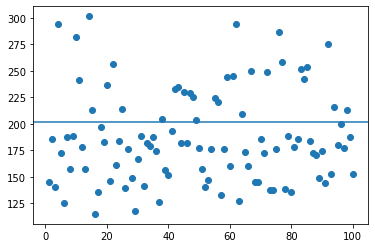

In [14]:
plt. scatter(range(1,101), sample_means)
plt.axhline(population_mean)

We see that the sample means vary a lot around the population mean. The sampling error is quite large for some of the cases. Because sample means vary a lot around the population mean, there's a good chance we get a sample that is not representative of the population.

How do we solve this problem now? 

We can solve this problem by increasing the sample size. As we increase the sample size, the sample means vary less around the population mean, and the chances of getting an unrepresentative sample decrease.

## Importance of Sample Size

sample_means = []
for i in range(100):
    sample = wnba['PTS'].sample(100, random_state=i) # sample size = 100
    sample_means.append(sample.mean())
print(max(sample_means))
print(min(sample_means))

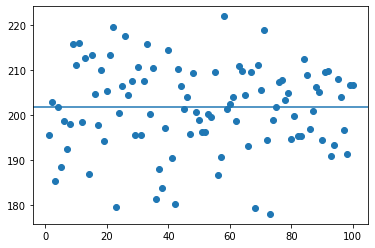

In [16]:
plt. scatter(range(1,101), sample_means)
plt.axhline(population_mean)

We can see how sample means tend to vary less around the population mean as we increase the sample size. From this observation we can make two conclusions:

- Simple random sampling isn't a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.
- When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which, in turn, decreases the chances that we'll get an unrepresentative sample.

## Stratified Sampling

Because simple random sampling is entirely random, it can exclude certain population individuals who are relevant to some of our questions.

If we perform simple random sampling, there's a chance that our sample won't include some categories. In other words, it's not guaranteed that we'll have a representative sample that has observations for every position we want to analyze.

There are five unique positions in our data set:

In [17]:
print(wnba['Pos'].unique())

['F' 'G/F' 'G' 'C' 'F/C']


Forward, Guard/Forward, Guard, Center, Forward/Center

The downside of simple random sampling is that it can exclude individuals playing a certain position. Visually, this is what could happen.

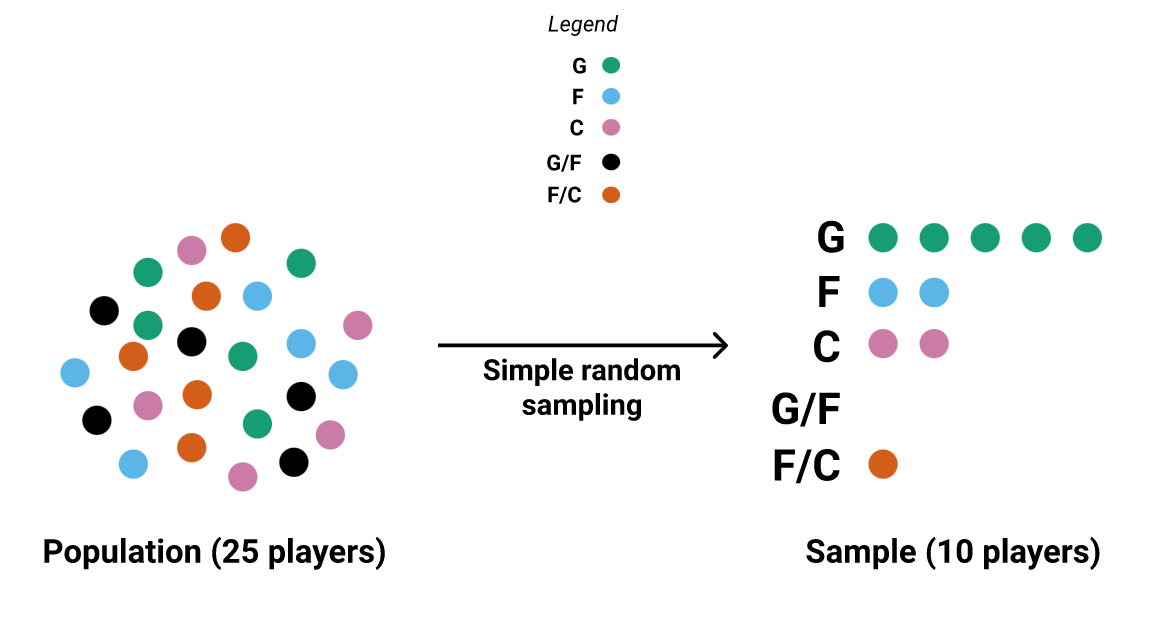

To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group.

Visually, on a smaller scale, we need to do this. We call this sampling method stratified sampling, and we call each stratified group a stratum.

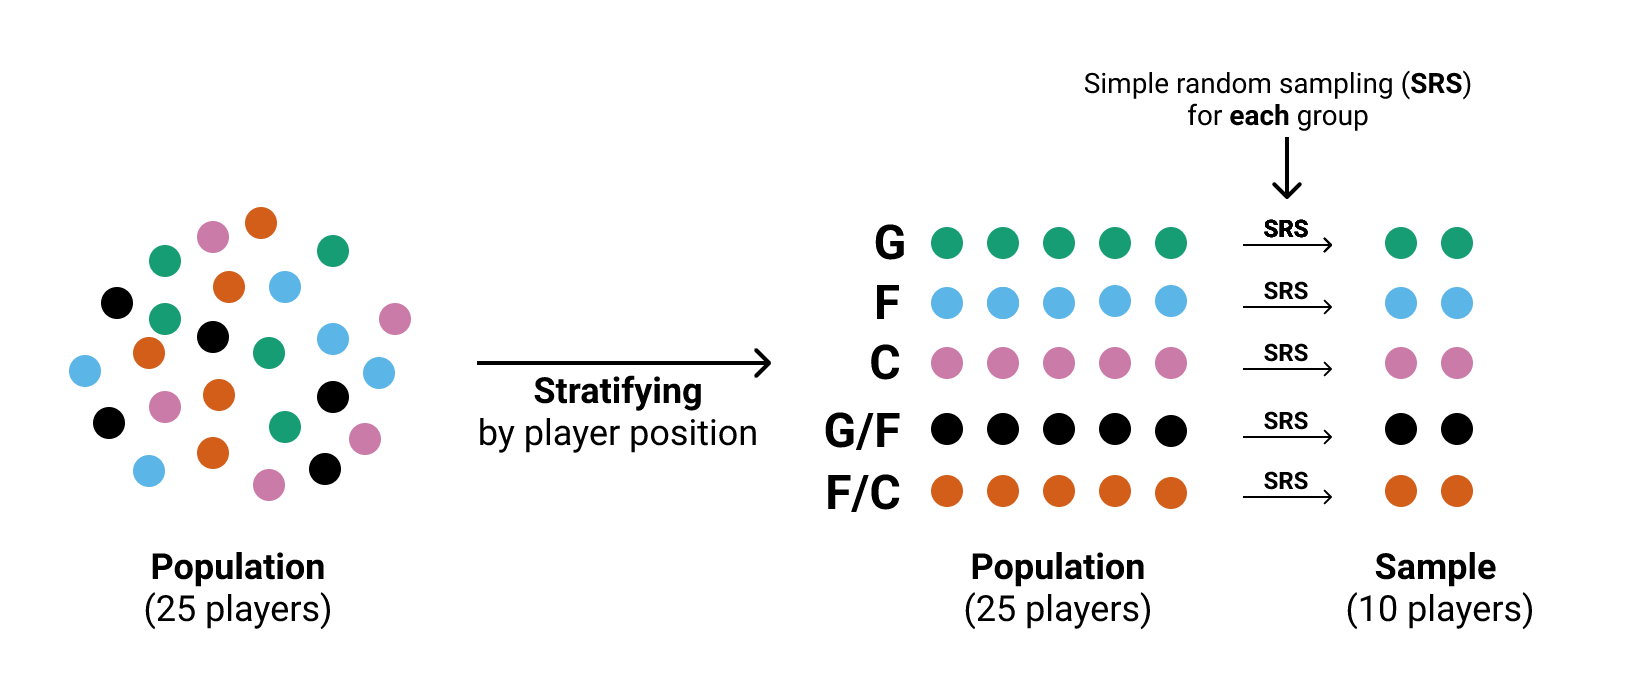

In [19]:
wnba[['PTS', 'Games Played']]

,PTS,Games Played
0,93,8
1,217,30
2,218,26
3,188,31
4,50,24
...,...,...
138,467,29
139,28,22
140,277,27
141,582,29


In [18]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']
wnba['Pts_per_game']

0      11.625000
1       7.233333
2       8.384615
3       6.064516
4       2.083333
         ...    
138    16.103448
139     1.272727
140    10.259259
141    20.068966
142     5.033333
Name: Pts_per_game, Length: 143, dtype: float64

In [20]:
# Unique Pos column value

wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

In [21]:
# Stratifying the data in five strata
# Perform stratified sampling

stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sampling on each stratum
    points_per_position[position] = sample.mean()
    
points_per_position

{'G': 7.092926195632343,
 'F': 8.702175158545568,
 'C': 9.833761394334251,
 'G/F': 6.817264935760487,
 'F/C': 9.059118773946361}

In [22]:
position_most_points = max(points_per_position, key = points_per_position.get)
position_most_points

'C'

## Proportional Stratified Sampling

We performed simple random sampling 100 times on the original dataset, and for each sample, we computed the mean number of total points a player scores in a season. The problem is that the number of games played, which ranges from 2 to 32, influences the number of total points:

In [23]:
wnba['Games Played'].unique()

array([ 8, 30, 26, 31, 24, 14, 16,  7, 28, 25, 22,  4, 15, 20,  5, 12, 29,
       19,  2, 23, 18, 27, 10, 21,  9, 32, 17])

In [24]:
print(wnba['Games Played'].min())

2


In [25]:
print(wnba['Games Played'].max())

32


In [26]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


Approximately 72.7 percent of the players had more than 23 games for the 2016-2017 season, which means that this category of players who played many games probably influenced the mean. 

As a side note on the output above, (1.969, 12.0], (12.0, 22.0] and (22.0, 32.0] are number intervals. The ( character indicates that the beginning of the interval isn't included, and the ] indicates that the endpoint is included. For example, (22.0, 32.0] means that 22.0 isn't included, while 32.0 is, and the interval contains this array of numbers: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32].

When we compute the mean of the total points using the population (the entire dataset), those 72.7 percent of players who played more than 23 games will probably significantly influence the mean. However, when we sample randomly, we can end up with a sample where the proportions are different than in the population.

For instance, we might end up with a sample where only 2 percent of the players played more than 23 games. This will result in a sample mean that underestimates the population mean. Or we could have a sample where more than 95 percent of the players had 23 games in the 2016-2017 season. This will result in overestimating the population mean. This scenario of under- or overestimation is common for small samples.

So, now, what is the solution to this problem?

One solution to this problem is to use stratified sampling while being mindful of the proportions in the population.  We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations. 

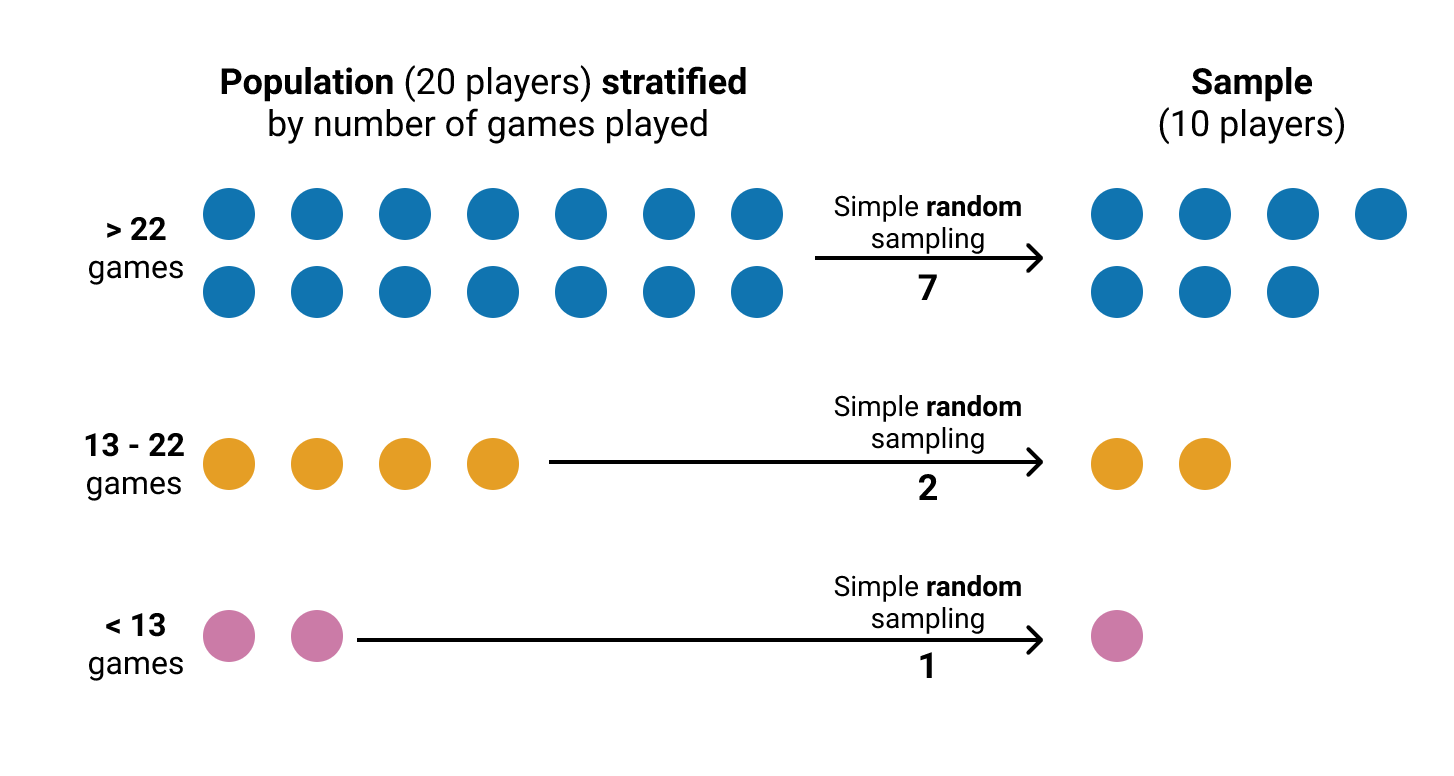

In the diagram above, we can see the following from a population of 20 individuals:

- 14 individuals played more than 22 games.
- 4 individuals played between 13 and 22 games.
- 2 individuals played below 13 games.

Transforming these figures to percentages, 70 percent of the individuals played more than 22 games, 20 percent played between 13 and 22 games, and 10 percent played below 13 games. Because we sampled proportionally, the same percentages (70 percent, 20 percent, 10 percent) are preserved in the sample (even though the absolute values are different): 70 percent played more than 22 games, 20 percent played between 13 and 22 games, and 10 percent played less than 13 games.

[185.9, 163.6, 176.0, 305.1, 241.1, 200.1, 272.5, 170.5, 190.5, 138.4, 165.7, 214.9, 130.0, 173.6, 195.0, 148.5, 192.6, 176.5, 267.2, 208.9, 153.6, 176.3, 206.3, 118.4, 268.3, 197.1, 154.7, 294.4, 160.9, 160.8, 203.4, 188.8, 274.9, 201.7, 275.3, 235.1, 141.2, 145.5, 222.7, 187.0, 231.3, 202.0, 230.2, 289.7, 249.1, 120.4, 222.7, 225.8, 217.9, 232.7, 176.0, 197.7, 177.6, 208.8, 144.8, 279.5, 330.3, 169.3, 123.2, 172.7, 169.7, 259.9, 191.9, 239.1, 177.3, 264.2, 151.9, 176.4, 180.5, 189.0, 227.6, 225.5, 161.5, 148.8, 208.7, 173.1, 200.1, 219.7, 260.3, 169.2, 159.0, 216.7, 204.3, 245.0, 234.4, 216.1, 196.9, 201.0, 191.8, 186.7, 202.6, 155.7, 182.5, 162.6, 192.5, 203.7, 230.2, 207.1, 157.4, 196.2]


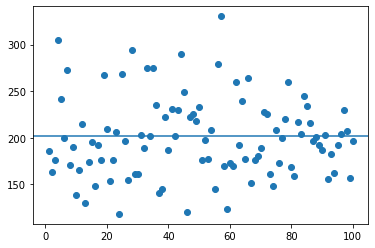

In [27]:
# Perform stratified sampling on the data set 100 times, and sample strata proportionally
# Stratify the dataset by the num of games played

under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    # Concatenate all sample observations
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
print(proportional_sampling_means)

# Display the proportional stratified sampling process
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

The result is still unimpressive. The variability of the sampling was quite large, and many sample means were unrepresentative, being far from the population mean. In fact, this proportional sampling method doesn't seem to perform better than simple random sampling. What is the reason for this poor performance and unimpressive result again?

The poor performance is a result of choosing bad strata. We stratified the data by the number of games played, but this isn't a good approach. A player has technically played one game even if she only played for one or two minutes, even though others play 30 or 40 minutes, and it still only qualifies as one game.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

Our dataset contains the total number of minutes played by each player for the entire season. If we make strata based on minutes played, and then sample proportionally using stratified sampling, we get something visibly better than simple random sampling (especially in terms of variability).

## Guidelines for choosing the right strata

- Minimize the variability within each stratum.
For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need more granular stratification (you need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

- Maximize the variability between strata.
Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or you might need to change the stratification criterion. On the previous screen, stratifying the data by games played resulted in strata that were similar to each other regarding the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

- The stratification criterion should correlate strongly with the property you're trying to measure.
For instance, the column describing minutes played (the criterion) should be correlate strongly with the number of total points (property we want to measure).

In [46]:
print(wnba['MIN'].min())

12


In [47]:
print(wnba['MIN'].max())

1018


In [45]:
# MIN = Minutes Played
# PTS = Total points
print(wnba['MIN'].value_counts(bins = 3, normalize = True)*100)

(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
(682.667, 1018.0]     31.468531
Name: MIN, dtype: float64


In [48]:
stratum_1 = wnba[(wnba['MIN'] > 11) & (wnba['MIN'] <= 347.333)]
stratum_2 = wnba[(wnba['MIN'] > 347.333) & (wnba['MIN'] <= 682.667)]
stratum_3 = wnba[(wnba['MIN'] > 682.667) & (wnba['MIN'] <= 1018)]

stratum_1.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,22,28,12,3,6,12,93,0,0,11.625000
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,9,12,12,7,0,14,50,0,0,2.083333
5,Alexis Peterson,SEA,G,170,63.0,21.799308,US,"June 20, 1995",22,Syracuse,...,13,16,11,5,0,11,26,0,0,1.857143
6,Alexis Prince,PHO,G,188,81.0,22.917610,US,"February 5, 1994",23,Baylor,...,14,15,5,4,3,3,24,0,0,1.500000
9,Allison Hightower,WAS,G,178,77.0,24.302487,US,"June 4, 1988",29,LSU,...,7,10,10,5,0,2,36,0,0,5.142857


[227.08333333333334, 222.91666666666666, 221.58333333333334, 229.83333333333334, 218.75, 172.58333333333334, 201.83333333333334, 206.75, 225.5, 192.91666666666666, 194.16666666666666, 184.75, 216.0, 195.5, 226.41666666666666, 197.83333333333334, 210.08333333333334, 173.5, 177.58333333333334, 169.08333333333334, 191.16666666666666, 226.08333333333334, 225.25, 221.5, 242.91666666666666, 209.83333333333334, 225.41666666666666, 259.4166666666667, 228.16666666666666, 182.0, 202.75, 196.25, 204.0, 198.41666666666666, 191.66666666666666, 182.16666666666666, 213.25, 188.0, 226.41666666666666, 191.16666666666666, 236.41666666666666, 246.33333333333334, 198.5, 178.33333333333334, 216.5, 194.66666666666666, 204.5, 204.58333333333334, 249.66666666666666, 219.08333333333334, 202.83333333333334, 204.33333333333334, 238.66666666666666, 217.25, 195.66666666666666, 184.33333333333334, 216.75, 206.0, 220.5, 161.75, 240.16666666666666, 201.25, 202.5, 217.83333333333334, 196.0, 182.0, 200.91666666666666, 

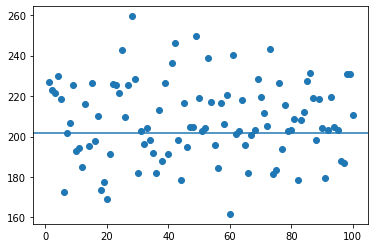

In [49]:
proportional_sampling_means = []

for i in range(100):
    sample_1 = stratum_1['PTS'].sample(4, random_state = i)
    sample_2 = stratum_2['PTS'].sample(4, random_state = i)
    sample_3 = stratum_3['PTS'].sample(4, random_state = i)
    
    # Concatenate all sample observations
    final_sample = pd.concat([sample_1, sample_2, sample_3])
    proportional_sampling_means.append(final_sample.mean())
print(proportional_sampling_means)

# Display the proportional stratified sampling process
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

## Cluster Sampling

Another common sampling use case is when the data is scattered across different locations (different websites, different databases, different companies, etc.). Cluster sampling would be a great choice in such a scenario.

The dataset we've been working with was scraped from the WNBA's website. The website centralizes data on basketball games and players in the WNBA. Let's suppose for a moment that such a site didn't exist, and the data were instead scattered across each individual team's website. There are twelve unique teams in our data set, which means we'd have to scrape twelve different websites, each of which requires its own scraping script.

This scenario is quite common in the data science workflow: you want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming or close to impossible. For instance, let's say you want to analyze how people review and rate movies as a function of movie budget. There are many websites that can help with data collection, but how can you go about it so that you can spend a day or two on getting the data you need, rather than a month or two?

One way is to list all the data sources you can find, and then randomly pick only a few of them from which to collect. Then you can individually sample each of the sources you've randomly picked. We call this sampling method cluster sampling, and we call each of the individual data sources a cluster.

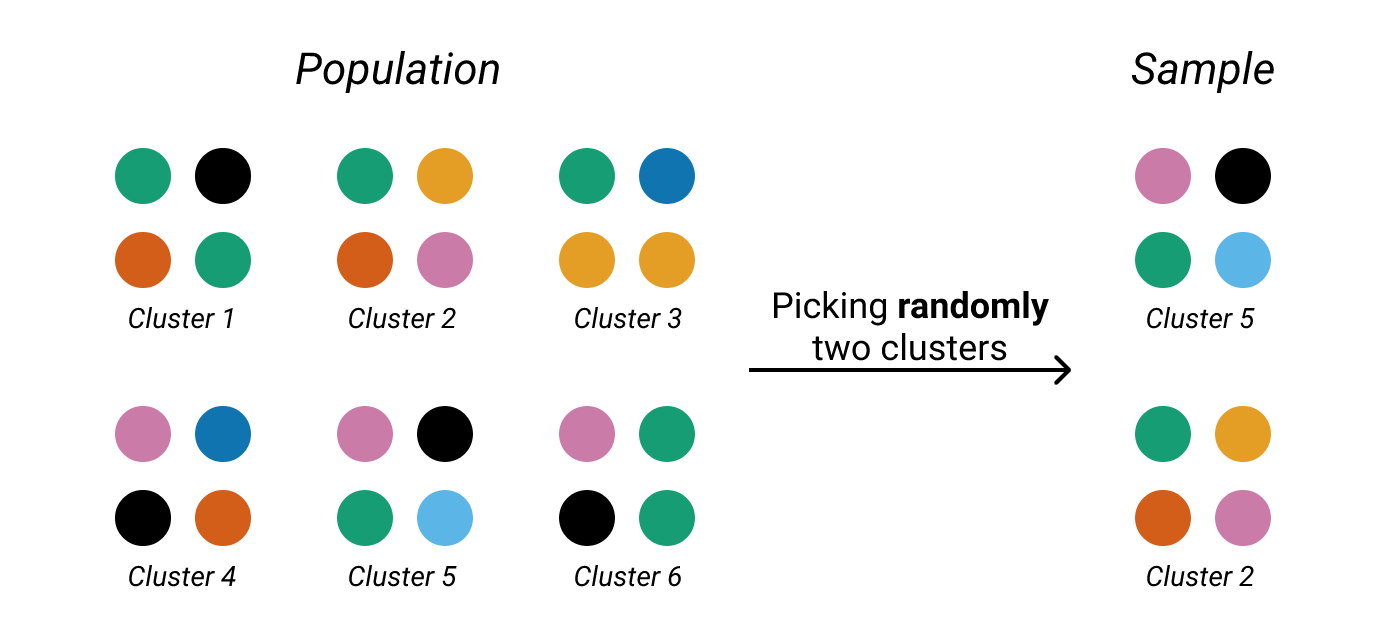

In our case, we'd first list all the possible data sources. Assuming that all the teams in our dataset have a website from which we can take data, we end up with this list of clusters (each team's website is a cluster) :

There are twelve unique teams in our data set.

In [50]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


Then we need to find a way to randomly pick a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. Here's one way to sample four clusters randomly:

In [51]:
print(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))

6     PHO
11    IND
4     MIN
10    ATL
dtype: object


Once we pick the clusters, we move to collecting the data. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters. For instance, we can use stratified sampling on the first two clusters, and simple random sampling on the other two.

In [52]:
# Let's simulate a cluster sampling on our data set

# Pick four team clusters randomly
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state=0)
print(clusters)

6     PHO
11    IND
4     MIN
10    ATL
dtype: object


In [53]:
# Collect the data from each clusters
sample = pd.DataFrame()
for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)
print(sample.shape) 
print(sample.columns)

(46, 33)
Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3',
       'Pts_per_game'],
      dtype='object')


In [55]:
sample.head(7)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game
6,Alexis Prince,PHO,G,188,81.0,22.917610,US,"February 5, 1994",23,Baylor,...,14,15,5,4,3,3,24,0,0,1.500000
15,Angel Robinson,PHO,F/C,198,88.0,22.446689,US,"August 30, 1995",21,Arizona State,...,42,58,8,1,11,16,58,0,0,3.866667
25,Brittney Griner,PHO,C,206,93.0,21.915355,US,"October 18, 1990",26,Baylor,...,129,172,39,13,54,52,461,6,0,20.954545
27,Camille Little,PHO,F,188,82.0,23.200543,US,"January 18, 1985",32,North Carolina,...,71,113,42,28,13,50,228,0,0,7.600000
32,Cayla George,PHO,C,193,87.0,23.356332,AU,"April 20, 1987",30,Georgia,...,71,81,15,9,11,13,100,1,0,3.571429
42,Danielle Robinson,PHO,G,175,57.0,18.612245,US,"October 5, 1989",27,Oklahoma,...,73,86,106,33,4,58,209,0,0,7.464286
45,Diana Taurasi,PHO,G,183,74.0,22.096808,US,"November 6, 1982",34,Connecticut,...,98,129,32,20,31,28,376,3,0,18.800000


In [56]:
sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()

In [57]:
sampling_error_height

-0.06400121617511445

In [58]:
sampling_error_age

-1.401337792642142

In [59]:
sampling_error_BMI

0.23095444165950596

So far, we've explored a few scenarios where sampling can be useful. There are more situations, however, when a data scientist can use sampling. Let's explore a few.

Let's say you work for an e-commerce company that has a table in a database with more than 10 million rows of online transactions. The marketing team asks you to analyze the data and find categories of customers with a low buying rate, so that they can target their marketing campaigns at the right people. Instead of working with more than 10 million rows at each step of your analysis, you can save a lot of code running time by sampling several hundred rows and performing your analysis on the sample. You can do a simple random sampling, but if you're interested in some categories beforehand, it might be a good idea to use stratified sampling.

Let's consider a different situation. Perhaps you need to collect data from an API that either has a usage limit or isn't free. In this case, you are more or less forced to sample. Knowing how and what to sample can be highly useful.

Another common sampling use case is when the data is scattered across different locations (different websites, different databases, different companies, etc.). As we discussed on the previous screen, cluster sampling would be a great choice in such a scenario.

Practical statistical analysis revolves entirely around the distinction between a population and a sample. When we're doing statistics in practice, our goal is either to describe a sample or a population or to use a sample to draw conclusions about the population to which it belongs (or a mix of these two goals).

When we describe a sample or a population (by measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs; etc.), we do descriptive statistics.

When we try to use a sample to draw conclusions about a population, we do inferential statistics (we infer information from the sample about the population).

Resources:

[Sampling](https://en.wikipedia.org/wiki/Sampling_(statistics))
    
[Statistical population](https://en.wikipedia.org/wiki/Statistical_population)
    
    